In [2]:
#queryrunner 
from queryrunner_client import Client
from queryrunner_client import QueryRunnerException
#from queryrunner_client import start_adhoc
import pandas as pd
import numpy as np
import plotly as py
import json
import pandas as pd
import plotly.graph_objects as go

from querybuilder_client import QuerybuilderClient
import matplotlib.pyplot as plt

11/11/2024 04:50:39 AM  Obtained utoken email from file 
11/11/2024 04:50:39 AM  Obtained utoken from utoken cli 
11/11/2024 04:50:39 AM  Could not obtain utoken from cli: b'/bin/sh: 1: usso: not found\n'
Trying to obtain from file 
11/11/2024 04:50:39 AM  Obtained utoken for user 


In [3]:
##pip install pandas openpyxl
file_path = 'zed_RD.xlsx'

In [4]:
xls = pd.ExcelFile(file_path)
print(xls.sheet_names)


['journey_data', 'Cancelation Reasons', 'Journey Type', 'Journey Status']


In [5]:
journey_data = pd.read_excel(xls, sheet_name='journey_data')
cancelation_reasons = pd.read_excel(xls, sheet_name='Cancelation Reasons')
journey_type = pd.read_excel(xls, sheet_name='Journey Type')
journey_status = pd.read_excel(xls, sheet_name='Journey Status')

In [6]:
journey_data.head(4)

,_id,modes,notes,actual,maxtry,payment,estimate,createdat,journeyid,updatedat,...,rejecteddrivers,drivermodessetup,reftransactionid,driveraddonssetup,indispatchdrivers,_ab_cdc_deleted_at,_ab_cdc_updated_at,vehiclecategorytype,refvehiclecategoryid,considereddispatchdrivers
0,668af74fd6aa19ab0d2faf9b,"{""refModeId"":""65d4ba07d30d222a7c7921b5"",""modeT...",NaN,"{""route"":""[{\""lng\"":55.3855037,\""lat\"":25.0847...",3,"{""refCardId"":null,""mode"":1,""_id"":""668af74fd6aa...","{""route"":""[{\""lat\"":25.08553,\""lng\"":55.38554}...",2024-07-07T20:15:11.732Z,SDGNFXEX99851,2024-08-02T09:02:09.172Z,...,[],True,NaN,True,"[{""refDriverId"":""65fd375806c53d6b843a233c"",""la...",NaN,2024-09-25T08:06:18Z,1,65d4bce6d30d222a7c7921bc,NaN
1,66953704d3606d4c9172ed39,"{""refModeId"":""65d4ba07d30d222a7c7921b4"",""modeT...",NaN,"{""fare"":{""totalPreTripWaitCharge"":0,""totalCanc...",3,"{""refCardId"":""669536d58ecb1306c22b61c9"",""mode""...","{""route"":""[{\""lat\"":25.22471,\""lng\"":55.44027}...",2024-07-15T14:49:40.070Z,SQWKLKMC44190,2024-07-28T07:02:14.191Z,...,[],False,NaN,False,[],NaN,2024-09-25T08:06:18Z,1,65d4bce6d30d222a7c7921bd,NaN
2,669822c11472774445121acb,"{""refModeId"":""65d4ba07d30d222a7c7921b6"",""modeT...",NaN,"{""fare"":{""totalCancellationFee"":0,""base"":0,""mi...",3,"{""refCardId"":null,""mode"":1,""_id"":""669822c11472...","{""route"":""[{\""lat\"":25.23131,\""lng\"":55.28292}...",2024-07-17T20:00:01.250Z,SDJWYZRH82586,2024-07-28T10:34:36.931Z,...,[],False,NaN,False,[],NaN,2024-09-25T08:06:18Z,1,65d4bce6d30d222a7c7921bc,NaN
3,669c174014727744451dc9a2,"{""refModeId"":""65d4ba07d30d222a7c7921b4"",""modeT...",NaN,"{""fare"":{""totalCancellationFee"":0,""base"":0,""mi...",3,"{""refCardId"":""667cba14a5438a20d85216cc"",""mode""...","{""route"":""[{\""lat\"":25.27073,\""lng\"":55.30922}...",2024-07-20T20:00:00.726Z,SZGJSIBT71606,2024-07-27T04:44:20.678Z,...,[],False,NaN,False,[],NaN,2024-09-25T08:06:18Z,1,65d4bce6d30d222a7c7921bc,NaN


In [7]:
cancelation_reasons.head(4)

,App,Journey Type,Journey Status,Reason,Reason ID
0,Customer,On Demand,Booking,My plans changed,653aad1f669135b5f3e6507b
1,Customer,On Demand,Booking,Need to change pick-up or drop-off,653aad1f669135b5f3e6507c
2,Customer,On Demand,Booking,Need to add stops,653aad1f669135b5f3e6507d
3,Customer,On Demand,Booking,Wanted to change car category,653aad1f669135b5f3e6507e


In [8]:
journey_type.head(4)

,Type,Value
0,On Demand,1
1,Scheduled,2


In [9]:
journey_status.head(4)

,JOURNEY STATUS,VALUE
0,BOOKED,1
1,DISPATCH,2
2,ACCEPTED,3
3,ON_ROUTE,4


## What are the top 5 cancellation reasons. Based on your understanding, how many journey cancellations are customer initiated and how many are driver initiated

***Assume journeyid as a unique identifier for dispatches

In [10]:
journey_data.columns

Index(['_id', 'modes', 'notes', 'actual', 'maxtry', 'payment', 'estimate',
       'createdat', 'journeyid', 'updatedat', 'currenttry', 'pickuptime',
       'refguestid', 'tippayment', 'journeytype', 'refdriverid', 'refrhythmid',
       'reportissue', 'cancelreason', 'driverrating', 'refvehicleid',
       'dispatchtries', 'journeyevents', 'journeystatus', 'refcustomerid',
       '_ab_cdc_cursor', 'customerrating', 'pickuplatitude', 'pickuplocation',
       'dropofflocation', 'pickuplongitude', 'refpromoapplied',
       'rejecteddrivers', 'drivermodessetup', 'reftransactionid',
       'driveraddonssetup', 'indispatchdrivers', '_ab_cdc_deleted_at',
       '_ab_cdc_updated_at', 'vehiclecategorytype', 'refvehiclecategoryid',
       'considereddispatchdrivers'],
      dtype='object')

In [69]:
final = pd.merge(journey_data, journey_status, left_on='journeystatus', right_on='VALUE', how='left')

In [70]:
final['JOURNEY STATUS'].unique()

array(['\xa0 PAYMENT_RECEIVED', '\xa0 USER_CANCELLED',
       '\xa0 ADMIN_CANCELLED', '\xa0 DRIVER_CANCELLED',
       '\xa0 ZED_CANCELLED'], dtype=object)

In [71]:
final['cancelreason'].head()

0                                                  NaN
1    {"refCancelReasonId":"653ab034022be070f7777a09...
2                                                  NaN
3                                                  NaN
4                                                  NaN
Name: cancelreason, dtype: object

In [13]:
final['refCancelReasonId'] = final['cancelreason'].apply(
    lambda x: json.loads(x)['refCancelReasonId'] if pd.notna(x) and isinstance(x, str) else None
)


In [14]:
final['refCancelReasonId']

0                          None
1      653ab034022be070f7777a09
2                          None
3                          None
4                          None
                 ...           
942                        None
943                        None
944                        None
945                        None
946                        None
Name: refCancelReasonId, Length: 947, dtype: object

In [15]:
final['JOURNEY STATUS'] = final['JOURNEY STATUS'].str.strip()
values_to_filter = ['USER_CANCELLED','DRIVER_CANCELLED']
final = final[final['JOURNEY STATUS'].isin(values_to_filter)]

In [16]:
final.groupby('JOURNEY STATUS')['journeyid'].nunique().reset_index(name='trips')


,JOURNEY STATUS,trips
0,DRIVER_CANCELLED,37
1,USER_CANCELLED,282


In [17]:
final = pd.merge(final, cancelation_reasons, left_on='refCancelReasonId', right_on='Reason ID', how='left')

In [18]:
final['Reason'] = final['Reason'].fillna('Data not available')
final['Reason'] = final['Reason'].replace('', 'Data not available')


In [19]:
result = final.groupby(['JOURNEY STATUS', 'Reason'])['journeyid'].nunique().reset_index(name='trips')


In [20]:
result = result.sort_values(by=['JOURNEY STATUS', 'trips'], ascending=[True, False])


In [21]:
result.head(20)

,JOURNEY STATUS,Reason,trips
0,DRIVER_CANCELLED,Data not available,37
12,USER_CANCELLED,ZeDriver is too far away,73
3,USER_CANCELLED,My plans changed,57
5,USER_CANCELLED,Need to change pick-up or drop-off,22
13,USER_CANCELLED,ZeDriver not responding,22
8,USER_CANCELLED,Wanted to change car category,18
6,USER_CANCELLED,Other,16
10,USER_CANCELLED,ZeDriver asked me to cancel,16
7,USER_CANCELLED,Taking too long to find a ZeDriver,14
2,USER_CANCELLED,Found a better price,13


## What are the high demand areas from customers. What is the trip completion rate of the highest and lowest demand areas. According to you, what can be the possible reason for variation of completion rate across areas, if any

***Assume journeyid as a unique identifier for dispatches
***Assume (lat, long) as a unique demand zone 

In [22]:
final = pd.merge(journey_data, journey_status, left_on='journeystatus', right_on='VALUE', how='left')

In [23]:
final['JOURNEY STATUS'] = final['JOURNEY STATUS'].str.strip()

In [24]:
final['JOURNEY STATUS'].unique()

array(['PAYMENT_RECEIVED', 'USER_CANCELLED', 'ADMIN_CANCELLED',
       'DRIVER_CANCELLED', 'ZED_CANCELLED'], dtype=object)

In [25]:
grouped = final.groupby(['pickuplatitude', 'pickuplongitude'])

def calculate_metrics(group): 
    filtered_df = group[group['JOURNEY STATUS'].isin(['ADMIN_COMPLETED', 'JOURNEY_COMPLETED'])]
    distinct_filtered_count = filtered_df['journeyid'].nunique()
    distinct_total_count = group['journeyid'].nunique()
    completion_rate = 1.000 * distinct_filtered_count / distinct_total_count
    return pd.Series({
        'completion_rate': completion_rate,
        'distinct_journeyid_count': distinct_total_count
    })

completion_rates = grouped.apply(calculate_metrics).reset_index()




In [26]:
completion_rates = completion_rates.sort_values(by=['completion_rate', 'distinct_journeyid_count'], ascending=[False,False])
completion_rates.head()

,pickuplatitude,pickuplongitude,completion_rate,distinct_journeyid_count
48,25.056223,55.203918,0.0,11.0
529,25.250399,55.300938,0.0,11.0
221,25.119926,55.218832,0.0,10.0
315,25.185928,55.283096,0.0,8.0
326,25.188667,55.270437,0.0,7.0


## Possible reasons for variation of completion rate across areas
## supply & demand variations 
    ## Depending on the kind of demand zone > there is seasonality and noise - airports/strikes / offices 
## Traffic 
## behaviour/ policies
    ## Need to understand if the requests are live or pre > tht may impact the behavior
## pricing 
    competition 
## Incentives/ motivation

## What is the average actual fare of all trips and how does it vary from average estimated fare. What can be the possible reasons for variation between the two, if any. What steps can you take to reduce the variations


***Assume journeyid as a unique identifier for dispatches

In [73]:
def extract_fare(json_str):
    try:
        json_obj = json.loads(json_str)
        total_fare = json_obj.get('fare', {}).get('totalFare')
        if total_fare is not None:
            return float(total_fare)  
        return None 
    except (json.JSONDecodeError, TypeError):
        return None


journey_data['actual_totalFare'] = journey_data['actual'].apply(extract_fare)
journey_data['estimated_totalFare'] = journey_data['estimate'].apply(extract_fare)



In [75]:
print("average_actual_fare:", journey_data['actual_totalFare'].mean())
print("average_est_fare:", journey_data['estimated_totalFare'].mean())

average_actual_fare: 32.420580781415
average_est_fare: 57.74578669482576


In [28]:
sum_actual_fare = journey_data['actual_totalFare'].sum()
sum_est_fare = journey_data['estimated_totalFare'].sum()
distinct_journey_count = journey_data['journeyid'].nunique()

average_actual_fare = 1.0 * sum_actual_fare / distinct_journey_count
average_est_fare = 1.0 * sum_est_fare / distinct_journey_count


print("average_actual_fare:", average_actual_fare)
print("average_est_fare:", average_est_fare)

average_actual_fare: 32.420580781415
average_est_fare: 57.74578669482576


## Possible reasons for variation between the two:
## Need to understand how estimated fare is calculated, factors that go in 
## Highlevel due to variation between Time and Distance which will be due to factors like driver not following the suggested routes, unpredictable events like longer traffics/ rider requests on stoppages in between etc. 
## Routes taken involved surge pricing/ wait time/ toll/ parking charges / cancellation fees etc which were not accounted for in the suggested routes / estimates 

## Refer to column “journeyevent” which provides information on various steps of the lifecycle of the journey. Where do you see the maximum drop-off from the driver and customer. Suggest ways to mitigate these.


***Assume journeyid as a unique identifier for dispatches
***Assume max eventid to be the dropp off location 


In [29]:
def extract_latest_event_data(row):
    try:
        events = json.loads(row['journeyevents'])
    except json.JSONDecodeError:
        return None 
    latest_event = max(events, key=lambda x: x['eventId'])
    return {
        'journeyid': row['journeyid'],
        'eventLatitude': latest_event['eventLatitude'],
        'eventLongitude': latest_event['eventLongitude']
    }

base_data = journey_data.apply(extract_latest_event_data, axis=1)
base = pd.json_normalize(base_data)
grouped = base.groupby(['eventLatitude', 'eventLongitude']).agg(dispatches=('journeyid', 'nunique')).reset_index()
grouped_sorted = grouped.sort_values(by='dispatches', ascending=False)


In [30]:
grouped_sorted.head(10)

,eventLatitude,eventLongitude,dispatches
0,0.000000,0.000000,46
683,25.250399,55.300938,11
387,25.185928,55.283096,7
15,25.009498,55.263929,4
65,25.056223,55.203918,4
420,25.193303,55.284594,4
713,25.255010,55.303329,3
243,25.115395,55.203123,3
305,25.136326,55.186337,3
270,25.119926,55.218832,3


Didnt understand the last part of the question 
Need to understand how far is drop off from the pre-set drop off 


## Create cohorts for high performing and low performing drivers. What parameters available in the dataset would you choose to decide this. Analyze the data to find out reasons behind the difference in performance between the two cohorts.


***Assume journeyid as a unique identifier for dispatches
***refdriverid is the column assumed to be driver unique identifier



Parameters that can be used
1.#Trips 
    completed(not present in data)
    accepted(not present in data)
    canceled (present in data)
2.#Distance traversed
3.Revenue$ - assumed to be total_actual_trip_fare
4.Customer satisfaction - assumed to be driver rating
6.dispatchtries and rejecteddrivers could also be used but need some more context about how this data gets populated 

## Trips 

In [31]:
final = pd.merge(journey_data, journey_status, left_on='journeystatus', right_on='VALUE', how='left')

In [32]:
final['JOURNEY STATUS'].unique()

array(['\xa0 PAYMENT_RECEIVED', '\xa0 USER_CANCELLED',
       '\xa0 ADMIN_CANCELLED', '\xa0 DRIVER_CANCELLED',
       '\xa0 ZED_CANCELLED'], dtype=object)

In [33]:
result = final.groupby('refdriverid')['journeyid'].nunique().reset_index(name='total_trips')
result = result.sort_values(by=['total_trips'], ascending=[False])

result.head()

,refdriverid,total_trips
201,66853db054ec732f348d80c9,8
482,66acbbed6434034b15ad7f11,7
84,664743775a8f4c6073a563c5,7
168,6672da8f4b5168c6b34d41a3,6
357,669e3330d1f174b6c8f27c41,6


In [34]:
result.shape

(493, 2)

## if P99 of a specific variable is x then it means only 1% of the drivers are greater than x.

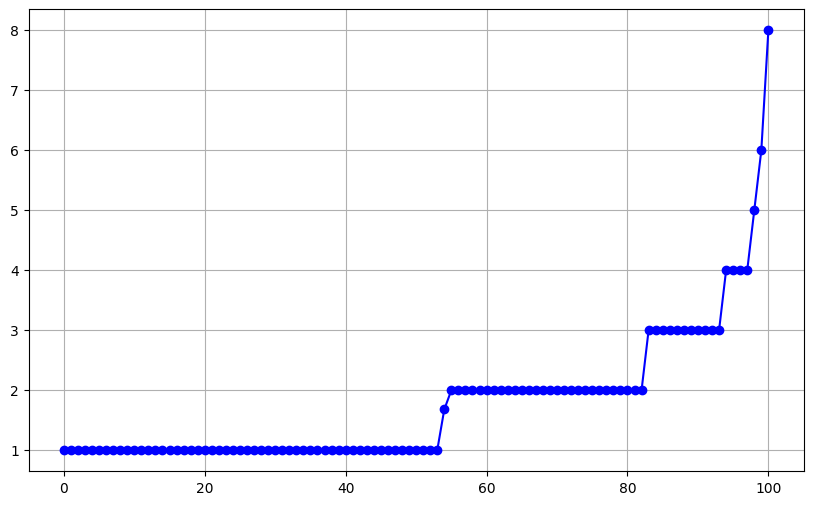

In [35]:
percentiles = np.percentile(result['total_trips'], np.arange(0, 101, 1))

plt.figure(figsize=(10, 6))
plt.plot(np.arange(0, 101), percentiles, marker='o', linestyle='-', color='b')

plt.grid(True)
plt.show()

In [36]:
p99 = np.percentile(result['total_trips'], 99)
p95 = np.percentile(result['total_trips'], 95)
p90 = np.percentile(result['total_trips'], 90)
p80 = np.percentile(result['total_trips'], 80)
p60 = np.percentile(result['total_trips'], 60)
p50 = np.percentile(result['total_trips'], 50)
p40 = np.percentile(result['total_trips'], 40)
p20 = np.percentile(result['total_trips'], 20)
p5 = np.percentile(result['total_trips'], 5)


# Print the values
print(f"P99 value: {p99}")
print(f"P95 value: {p95}")
print(f"P90 value: {p90}")
print(f"P80 value: {p80}")
print(f"P60 value: {p60}")
print(f"P50 value: {p50}")
print(f"P40 value: {p40}")
print(f"P20 value: {p20}")
print(f"P5 value: {p5}")


P99 value: 6.0
P95 value: 4.0
P90 value: 3.0
P80 value: 2.0
P60 value: 2.0
P50 value: 1.0
P40 value: 1.0
P20 value: 1.0
P5 value: 1.0


## Revenue

In [40]:
def extract_fare(json_str):
    try:
        json_obj = json.loads(json_str)
        total_fare = json_obj.get('fare', {}).get('totalFare')
        if total_fare is not None:
            return float(total_fare)  
        return None  
    except (json.JSONDecodeError, TypeError):
        return None

journey_data['actual_totalFare'] = journey_data['actual'].apply(extract_fare)
journey_data['estimated_totalFare'] = journey_data['estimate'].apply(extract_fare)



In [41]:
result1 = journey_data.groupby('refdriverid')['actual_totalFare'].sum().reset_index(name='total_fare')
result1 = result1.sort_values(by=['total_fare'], ascending=[False])

result1.head()

,refdriverid,total_fare
69,6620d31d5a473db3ad1b3927,300.11
232,668f9bead1f174b6c8a1b55d,298.87
352,669c1e6c4b0e51777d39a5ec,291.49
168,6672da8f4b5168c6b34d41a3,274.78
200,66852e08ebc4992d6bd488cf,262.82


In [42]:
result1.shape

(493, 2)

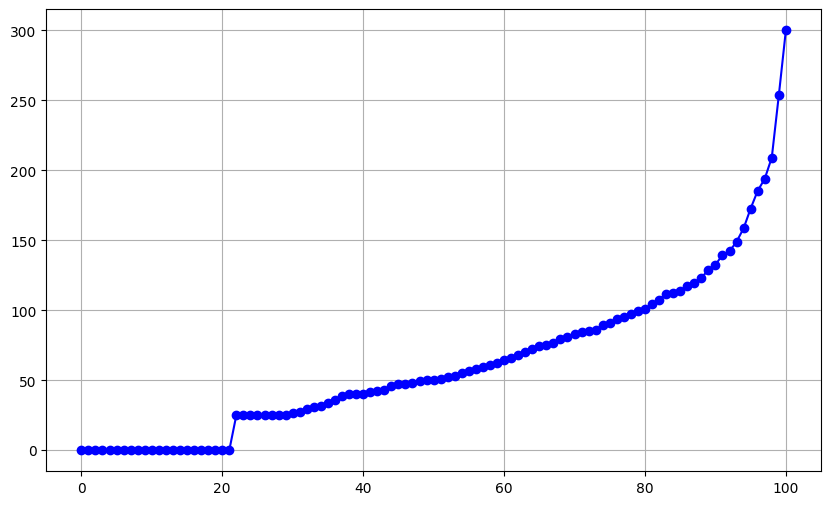

In [43]:
percentiles = np.percentile(result1['total_fare'], np.arange(0, 101, 1))
plt.figure(figsize=(10, 6))
plt.plot(np.arange(0, 101), percentiles, marker='o', linestyle='-', color='b')


plt.grid(True)
plt.show()

In [44]:
p99 = np.percentile(result1['total_fare'], 99)
p95 = np.percentile(result1['total_fare'], 95)
p90 = np.percentile(result1['total_fare'], 90)
p80 = np.percentile(result1['total_fare'], 80)
p60 = np.percentile(result1['total_fare'], 60)
p50 = np.percentile(result1['total_fare'], 50)
p40 = np.percentile(result1['total_fare'], 40)
p20 = np.percentile(result1['total_fare'], 20)
p5 = np.percentile(result1['total_fare'], 5)



print(f"P99 value: {p99}")
print(f"P95 value: {p95}")
print(f"P90 value: {p90}")
print(f"P80 value: {p80}")
print(f"P60 value: {p60}")
print(f"P50 value: {p50}")
print(f"P40 value: {p40}")
print(f"P20 value: {p20}")
print(f"P5 value: {p5}")

P99 value: 253.65679999999986
P95 value: 172.74199999999996
P90 value: 132.554
P80 value: 100.61
P60 value: 64.62599999999999
P50 value: 50.56
P40 value: 40.396
P20 value: 0.0
P5 value: 0.0


## Rating

In [45]:
def extract_json_fields(json_str):
    if isinstance(json_str, str): 
        try:
            data = json.loads(json_str)
            review = data.get('review', '')
            value = data.get('value', None)
            badges = data.get('badges', [])
            return value
        except json.JSONDecodeError:
            return None 
    else:
        return None  

journey_data['value'] = journey_data['driverrating'].apply(
    lambda x: pd.Series(extract_json_fields(x), dtype='float64')
)

In [46]:
journey_data.head()

,_id,modes,notes,actual,maxtry,payment,estimate,createdat,journeyid,updatedat,...,driveraddonssetup,indispatchdrivers,_ab_cdc_deleted_at,_ab_cdc_updated_at,vehiclecategorytype,refvehiclecategoryid,considereddispatchdrivers,actual_totalFare,estimated_totalFare,value
0,668af74fd6aa19ab0d2faf9b,"{""refModeId"":""65d4ba07d30d222a7c7921b5"",""modeT...",NaN,"{""route"":""[{\""lng\"":55.3855037,\""lat\"":25.0847...",3,"{""refCardId"":null,""mode"":1,""_id"":""668af74fd6aa...","{""route"":""[{\""lat\"":25.08553,\""lng\"":55.38554}...",2024-07-07T20:15:11.732Z,SDGNFXEX99851,2024-08-02T09:02:09.172Z,...,True,"[{""refDriverId"":""65fd375806c53d6b843a233c"",""la...",NaN,2024-09-25T08:06:18Z,1,65d4bce6d30d222a7c7921bc,NaN,39.45,41.99,1.0
1,66953704d3606d4c9172ed39,"{""refModeId"":""65d4ba07d30d222a7c7921b4"",""modeT...",NaN,"{""fare"":{""totalPreTripWaitCharge"":0,""totalCanc...",3,"{""refCardId"":""669536d58ecb1306c22b61c9"",""mode""...","{""route"":""[{\""lat\"":25.22471,\""lng\"":55.44027}...",2024-07-15T14:49:40.070Z,SQWKLKMC44190,2024-07-28T07:02:14.191Z,...,False,[],NaN,2024-09-25T08:06:18Z,1,65d4bce6d30d222a7c7921bd,NaN,0.00,124.90,NaN
2,669822c11472774445121acb,"{""refModeId"":""65d4ba07d30d222a7c7921b6"",""modeT...",NaN,"{""fare"":{""totalCancellationFee"":0,""base"":0,""mi...",3,"{""refCardId"":null,""mode"":1,""_id"":""669822c11472...","{""route"":""[{\""lat\"":25.23131,\""lng\"":55.28292}...",2024-07-17T20:00:01.250Z,SDJWYZRH82586,2024-07-28T10:34:36.931Z,...,False,[],NaN,2024-09-25T08:06:18Z,1,65d4bce6d30d222a7c7921bc,NaN,0.00,29.96,NaN
3,669c174014727744451dc9a2,"{""refModeId"":""65d4ba07d30d222a7c7921b4"",""modeT...",NaN,"{""fare"":{""totalCancellationFee"":0,""base"":0,""mi...",3,"{""refCardId"":""667cba14a5438a20d85216cc"",""mode""...","{""route"":""[{\""lat\"":25.27073,\""lng\"":55.30922}...",2024-07-20T20:00:00.726Z,SZGJSIBT71606,2024-07-27T04:44:20.678Z,...,False,[],NaN,2024-09-25T08:06:18Z,1,65d4bce6d30d222a7c7921bc,NaN,0.00,72.27,NaN
4,669974401472774445165c1c,"{""refModeId"":""65d4ba07d30d222a7c7921b5"",""modeT...",NaN,"{""fare"":{""totalCancellationFee"":0,""base"":0,""mi...",3,"{""refCardId"":null,""mode"":1,""_id"":""669974401472...","{""route"":""[{\""lat\"":25.01119,\""lng\"":55.10941}...",2024-07-18T20:00:00.813Z,SURMBOEN68989,2024-08-02T04:13:38.211Z,...,False,"[{""refDriverId"":""667166f91ea563f273ade4f1"",""la...",NaN,2024-09-25T08:06:18Z,1,65d4bce6d30d222a7c7921bc,NaN,0.00,68.07,NaN


In [47]:
result2 = journey_data.groupby('refdriverid')['value'].mean().reset_index(name='avg_rating')
result2 = result2.sort_values(by=['avg_rating'], ascending=[False])

result2.head()

,refdriverid,avg_rating
2,65ddd247b17ddd0b3480d485,5.0
333,669b2dc42ce67e382648ad51,5.0
319,6698e1b64b0e51777ddf5610,5.0
320,6698f8cad1f174b6c86a05de,5.0
321,6698fa114b0e51777de28952,5.0


In [48]:
result2.shape

(493, 2)

In [49]:
result2 = result2.dropna(subset=['avg_rating'])

In [50]:
result2.shape

(142, 2)

In [51]:
p99 = np.percentile(result2['avg_rating'], 99)
p95 = np.percentile(result2['avg_rating'], 95)
p90 = np.percentile(result2['avg_rating'], 90)
p80 = np.percentile(result2['avg_rating'], 80)
p60 = np.percentile(result2['avg_rating'], 60)
p50 = np.percentile(result2['avg_rating'], 50)
p40 = np.percentile(result2['avg_rating'], 40)
p20 = np.percentile(result2['avg_rating'], 20)
p5 = np.percentile(result2['avg_rating'], 5)



print(f"P99 value: {p99}")
print(f"P95 value: {p95}")
print(f"P90 value: {p90}")
print(f"P80 value: {p80}")
print(f"P60 value: {p60}")
print(f"P50 value: {p50}")
print(f"P40 value: {p40}")
print(f"P20 value: {p20}")
print(f"P5 value: {p5}")

P99 value: 5.0
P95 value: 5.0
P90 value: 5.0
P80 value: 5.0
P60 value: 5.0
P50 value: 5.0
P40 value: 5.0
P20 value: 5.0
P5 value: 4.0


## Distance travelled 

In [52]:
def extract_fare(json_str):
    try:
        json_obj = json.loads(json_str)
        total_fare = json_obj.get('fare', {}).get('totalDistance')
        if total_fare is not None:
            return float(total_fare) 
        return None 
    except (json.JSONDecodeError, TypeError):
        return None

journey_data['totalDistance'] = journey_data['actual'].apply(extract_fare)
journey_data['totalDistance']

0      23.95
1       0.00
2       0.00
3       0.00
4       0.00
       ...  
942    16.88
943    19.20
944    28.07
945    44.85
946     4.91
Name: totalDistance, Length: 947, dtype: float64

In [53]:
result3 = journey_data.groupby('refdriverid')['totalDistance'].sum().reset_index(name='total_distance')
result3 = result3.sort_values(by=['total_distance'], ascending=[False])

result3.head()

,refdriverid,total_distance
232,668f9bead1f174b6c8a1b55d,199.84
69,6620d31d5a473db3ad1b3927,189.59
352,669c1e6c4b0e51777d39a5ec,184.50
348,669ba9752ce67e3826565063,171.36
200,66852e08ebc4992d6bd488cf,169.70


In [54]:
result3.shape

(493, 2)

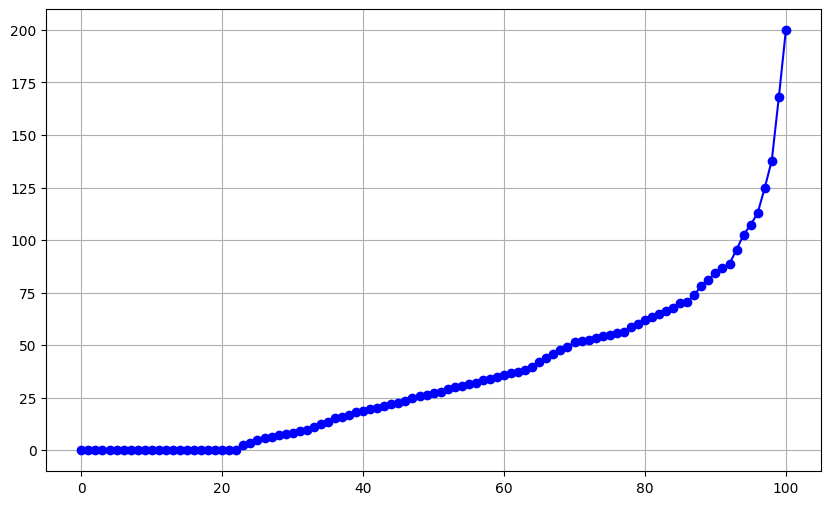

In [55]:
percentiles = np.percentile(result3['total_distance'], np.arange(0, 101, 1))

plt.figure(figsize=(10, 6))
plt.plot(np.arange(0, 101), percentiles, marker='o', linestyle='-', color='b')

plt.grid(True)
plt.show()

In [56]:
p99 = np.percentile(result3['total_distance'], 99)
p95 = np.percentile(result3['total_distance'], 95)
p90 = np.percentile(result3['total_distance'], 90)
p80 = np.percentile(result3['total_distance'], 80)
p60 = np.percentile(result3['total_distance'], 60)
p50 = np.percentile(result3['total_distance'], 50)
p40 = np.percentile(result3['total_distance'], 40)
p20 = np.percentile(result3['total_distance'], 20)
p5 = np.percentile(result3['total_distance'], 5)

print(f"P99 value: {p99}")
print(f"P95 value: {p95}")
print(f"P90 value: {p90}")
print(f"P80 value: {p80}")
print(f"P60 value: {p60}")
print(f"P50 value: {p50}")
print(f"P40 value: {p40}")
print(f"P20 value: {p20}")
print(f"P5 value: {p5}")

P99 value: 167.89679999999998
P95 value: 107.21999999999998
P90 value: 84.4
P80 value: 62.06000000000002
P60 value: 35.964
P50 value: 27.06
P40 value: 18.7
P20 value: 0.0
P5 value: 0.0


## trips = result 
## revenue = result1
## rating = result2
## distance travelled = result3

In [57]:
journey_data['refdriverid'].nunique()

493

In [58]:
result1.shape

(493, 2)

In [59]:
result.shape

(493, 2)

In [60]:
result3.shape

(493, 2)

In [61]:
final = pd.merge(result, result1, left_on='refdriverid', right_on='refdriverid', how='left')
final = pd.merge(final, result3, left_on='refdriverid', right_on='refdriverid', how='left')
final = pd.merge(final, result2, left_on='refdriverid', right_on='refdriverid', how='left')

In [62]:
final.shape

(493, 5)

In [63]:
final.head()

,refdriverid,total_trips,total_fare,total_distance,avg_rating
0,66853db054ec732f348d80c9,8,74.86,53.36,NaN
1,66acbbed6434034b15ad7f11,7,158.33,69.83,5.0
2,664743775a8f4c6073a563c5,7,223.73,105.02,5.0
3,6672da8f4b5168c6b34d41a3,6,274.78,155.03,5.0
4,669e3330d1f174b6c8f27c41,6,196.62,130.62,5.0


*** distance 
##Top Tier: Values at or above P95 (107.22) or P99 (167.90)
##Bottom Tier: Values at or below P20 (0.0)
    
*** fare 
##Top Tier: Values >= P95 = 172.74 (or >= P99 = 253.66 for stricter classification).
##Bottom Tier: Values <= P20 = 0.0 (or <= P5 = 0.0)
    
*** Trips 
##Top Tier: Values >= P95 = 4.0 (or >= P99 = 6.0 for stricter classification).
##Bottom Tier: Values <= P20 = 1.0 (or <= P5 = 1.0)

*** Ratings
##data too sparse (<30% of drivers have a rating!), better to not consider in defining cohorts 


In [64]:
## P95 (not very strict) if strict then P99

top_tier_p95 = final[(final['total_trips'] >= 4) & (final['total_fare'] >= 172.74) & (final['total_distance'] >= 107.22)]
top_tier_p99 = final[(final['total_trips'] >= 6) & (final['total_fare'] >= 253.66) & (final['total_distance'] >= 167.90)]
bottom_tier = final[(final['total_trips'] <= 1.0) & (final['total_fare'] <= 0.0) & (final['total_distance'] <= 0.0)]

In [65]:
top_tier_p95.shape

(11, 5)

In [66]:
top_tier_p95.shape

(11, 5)

In [67]:
bottom_tier.shape

(89, 5)